# Sobre o conjunto de dados

A doença por coronavírus (COVID-19) é uma doença infecciosa causada pelo vírus SARS-CoV-2.

A maioria das pessoas infectadas com o vírus experimentará doenças respiratórias leves a moderadas e se recuperará sem a necessidade de tratamento especial. No entanto, alguns ficarão gravemente doentes e precisarão de atenção médica. Pessoas idosas e aqueles com condições médicas subjacentes, como doenças cardiovasculares, diabetes, doenças respiratórias crônicas ou câncer, são mais propensos a desenvolver doenças graves. Qualquer pessoa pode ficar doente com COVID-19 e ficar gravemente doente ou morrer em qualquer idade.

A melhor maneira de prevenir e retardar a transmissão é estar bem informado sobre a doença e como o vírus se espalha. Proteja-se e aos outros da infecção, permanecendo a pelo menos 1 metro de distância dos outros, usando uma máscara devidamente ajustada e lavando as mãos ou usando uma fricção à base de álcool com frequência. Vacine-se quando for a sua vez e siga as orientações locais.

O vírus pode se espalhar da boca ou nariz de uma pessoa infectada em pequenas partículas líquidas quando tosse, espirra, fala, canta ou respira. Essas partículas variam de gotículas respiratórias maiores a aerossóis menores. É importante praticar a etiqueta respiratória, por exemplo, tossindo em um cotovelo flexionado, e ficar em casa e se auto-isolar até se recuperar se você se sentir mal.

Todo projeto deve iniciar com a análise dos dados, para tanto faz-se necessário:
- Importar as bibliotecas necessárias;
- Importar as bases a serem utilizadas no projeto;
- Visualizar os dados contidos na base;
- Verificar a inconsistência do domínio dos dados;
- Corrigir as inconsistências do domínio (tipo) dos dados;
- Verificar colunas não necessárias no modelo e excluí-las;
- Verificar a existência de dados não preenchidos na base;
- Decidir o quê deverá ser feito com estas colunas/linhas (excluir, preencher com determinados valores, ...)
- Visualizar novamente a base;
- Análise estatística rápida da base, obtendo a: média, mediana, moda, desvio padrão, quartis...
- Aplicar filtros para entender os dados;


## De acordo com a descrição, faça o tratamento dos dados e responda as seguintes questões:

### Os top 10 países que mais registraram casos de COVID?
### Os top 10 países que mais apresentaram casos de morte por COVID?
### Onde os casos ainda são altos?
### Apresentar os resultados em um gráfico de barras

# Informar o nome dos componentes da equipe:
- Aluno 1: João Victor Alves de Meira

- Aluno 2: ThomasYoshihiro Kofuji

- Aluno 3:

In [11]:
# Importar as bibliotecas necessárias para realizar a análise de dados
import pandas as pd
import numpy as np

In [12]:
# Importar a base de dados
df = pd.read_csv('/content/sample_data/covid_worldwide.csv')


In [13]:
# Visualizar as 10 primeiras linhas
df.head(10)

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
5,6,Japan,"32,588,442","68,399","21,567,425","10,952,618","92,144,639","125,584,838"
6,7,S. Korea,"30,197,066","33,486","29,740,877","422,703","15,804,065","51,329,899"
7,8,Italy,"25,453,789","186,833","25,014,986","251,970","265,478,247","60,262,770"
8,9,UK,"24,274,361","204,171","24,020,088","50,102","522,526,476","68,497,907"
9,10,Russia,"21,958,696","395,108","21,356,008","207,580","273,400,000","145,805,947"


In [14]:
# Visualizar as 5 últimas linhas
df.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5,NaN,"1,378"


In [15]:
# Visualizar a quantidade de linhas e colunas da base de dados
df.shape

(231, 8)

In [16]:
# Verificar os tipos dos campos, se estes estão nulos ou não
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [17]:
# Verificar se há linhas duplicadas na base
df.duplicated().sum()

0

In [18]:
# Transformar os campos tipo Object para Float, com exceção do nome dos países
for column in df.columns:
    if column != 'Country' and df[column].dtype == 'object':
        df[column] = df[column].str.replace(",", "").astype(float)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    float64
 3   Total Deaths     225 non-null    float64
 4   Total Recovered  210 non-null    float64
 5   Active Cases     212 non-null    float64
 6   Total Test       213 non-null    float64
 7   Population       228 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 14.6+ KB


In [19]:
# Verificando as linhas que tem pelo menos um valor NaN

df[df.isna().any(axis=1)]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,11,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
29,30,DPRK,4772813.0,74.0,4772739.0,0.0,NaN,25990679.0
65,66,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,78,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
90,91,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
94,95,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,112,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,113,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,114,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,118,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0


In [20]:
# Tratar os dados inconsistentes (sem valor)

#Tratamento dos valores NaN

'''
Verifica se algum valor da colunas 'Total Deaths', 'Total Recovered', 'Active Cases' é igual o da coluna 'Total Cases'
Se sim preenche as outras duas com 0
'''

for index in df.index:

  if df.loc[index, ['Total Deaths', 'Total Recovered', 'Active Cases']].isnull().any():

    total_cases = df.loc[index, 'Total Cases']
    total_deaths = df.loc[index, 'Total Deaths']
    total_recovered = df.loc[index, 'Total Recovered']
    active_cases = df.loc[index, 'Active Cases']

    if total_deaths == total_cases:
        df.loc[index, ['Total Recovered', 'Active Cases']] = 0.0
    elif total_recovered == total_cases:
        df.loc[index, ['Total Deaths', 'Active Cases']] = 0.0
    elif active_cases == total_cases:
        df.loc[index, ['Total Deaths', 'Total Recovered']] = 0.0

"""
Calcula as proporções médias de mortes e recuperados em relação ao total de casos,
ignorando valores NaN.
"""

def calculate_proportions(df):

    # Proporção para 'Total Deaths': usa apenas linhas onde 'Total Deaths' e 'Total Cases' não são NaN
    valid_deaths = df[df['Total Deaths'].notna()]
    death_rate = valid_deaths['Total Deaths'].sum() / valid_deaths['Total Cases'].sum()

    # Proporção para 'Total Recovered': usa apenas linhas onde 'Total Recovered' e 'Total Cases' não são NaN
    valid_recovered = df[df['Total Recovered'].notna()]
    recovery_rate = valid_recovered['Total Recovered'].sum() / valid_recovered['Total Cases'].sum()

    return death_rate, recovery_rate

"""
Preenche as linhas em que somente uma coluna (entre Total Deaths, Total Recovered e Active Cases) está faltando.
"""

def fill_with_a_column(df):

    for index in df.index:
        if df.loc[index, ['Total Deaths', 'Total Recovered', 'Active Cases']].isnull().sum() == 1:
            total_cases = df.loc[index, 'Total Cases']
            total_deaths = df.loc[index, 'Total Deaths']
            total_recovered = df.loc[index, 'Total Recovered']
            active_cases = df.loc[index, 'Active Cases']

            if pd.isnull(total_deaths):
                df.loc[index, 'Total Deaths'] = total_cases - total_recovered - active_cases
            elif pd.isnull(total_recovered):
                df.loc[index, 'Total Recovered'] = total_cases - total_deaths - active_cases
            elif pd.isnull(active_cases):
                df.loc[index, 'Active Cases'] = total_cases - total_deaths - total_recovered

"""
Preenche uma única coluna faltante em todas as linhas usando uma proporção calculada.
"""

def fill_column_with_proportion(df, column, proportion):

    for index in df.index:
        if pd.isnull(df.loc[index, column]):
            df.loc[index, column] = df.loc[index, 'Total Cases'] * proportion

# Tentar preencher as linhas com uma coluna faltante
fill_with_a_column(df)

# Calcular as proporções médias
death_rate, recovery_rate = calculate_proportions(df)

# Preencher "Total Deaths" com a proporção e tentar novamente preencher linhas com uma coluna faltante
fill_column_with_proportion(df, 'Total Deaths', death_rate)
fill_with_a_column(df)

# Preencher "Total Recovered" com a proporção e tentar novamente preencher linhas com uma coluna faltante
fill_column_with_proportion(df, 'Total Recovered', recovery_rate)
fill_with_a_column(df)

#Preenchendo com informações da net, já que são só 3 linhas

df.loc[90, 'Population'] = 1411100000.0
df.loc[226, 'Population'] = 3711.0
df.loc[229, 'Population'] = 3711.0

In [21]:
# Excluir o campos desnecessários na base
df = df.drop('Total Test', axis=1)
df = df.drop('Serial Number', axis=1)

df[df.isna().any(axis=1)]

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Population


In [22]:
# Visualizar a base de dados novamente
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Population
0,USA,104196861.0,1132935.0,101322779.0,1741147.0,3.348053e+08
1,India,44682784.0,530740.0,44150289.0,1755.0,1.406632e+09
2,France,39524311.0,164233.0,39264546.0,95532.0,6.558452e+07
3,Germany,37779833.0,165711.0,37398100.0,216022.0,8.388360e+07
4,Brazil,36824580.0,697074.0,35919372.0,208134.0,2.153536e+08
...,...,...,...,...,...,...
226,Diamond Princess,712.0,13.0,699.0,0.0,3.711000e+03
227,Vatican City,29.0,0.0,29.0,0.0,7.990000e+02
228,Western Sahara,10.0,1.0,9.0,0.0,6.261610e+05
229,MS Zaandam,9.0,2.0,7.0,0.0,3.711000e+03


In [23]:
# Verificar as informações estatísticas da base importada, como: média, mediana, desvio padrão e quartis
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Population
count,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,2.923460e+06,2.927706e+04,2.807852e+06,8.633072e+04,3.423191e+07
std,9.479286e+06,1.041073e+05,9.154199e+06,7.351236e+05,1.364188e+08
min,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.990000e+02
25%,2.400100e+04,1.795000e+02,2.168764e+04,6.300000e+01,4.281115e+05
50%,2.065920e+05,1.965000e+03,1.860880e+05,1.253000e+03,5.554960e+06
75%,1.296146e+06,1.390850e+04,1.269204e+06,9.788500e+03,2.183934e+07
max,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.411100e+09


In [34]:
# Verificar as informações estatísticas dos dados não numéricos

# Só temos a coluna 'Country' como não numérica, e com ela não temos informações estatísticas

<Axes: title={'center': 'Países com 75% ou mais de Casos Ativos em relação ao Total de Casos'}, xlabel='Country'>

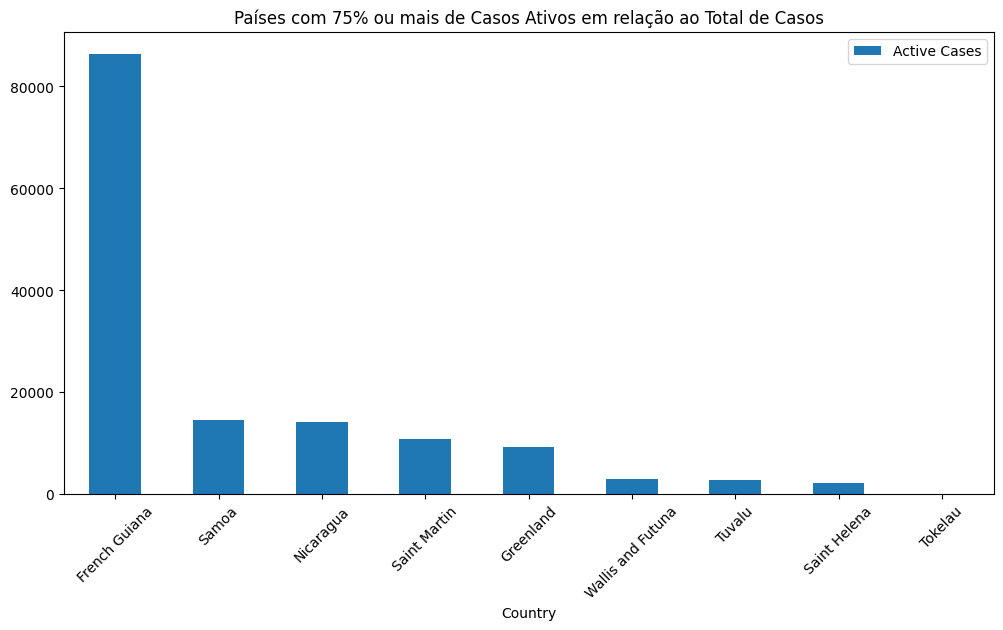

In [33]:
# Aplicar filtros necessários para responder as 3 questões acima

# Filtrar países onde os casos ativos são 90% ou mais do total de casos
high_active_ratio = df[df['Active Cases'] >= 0.75 * df['Total Cases']]

# Ordenar de forma decrescente pelo número de casos ativos
high_active_ratio = high_active_ratio.sort_values(by=['Active Cases'], ascending=False)

# Criando o gráfico de barras
high_active_ratio.plot(
    x='Country',
    y='Active Cases',
    kind='bar',
    figsize=(12, 6),
    title='Países com 75% ou mais de Casos Ativos em relação ao Total de Casos',
    rot=45
)
